In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
from plotly.subplots import make_subplots

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ds

/content/drive/MyDrive/ds


In [4]:
score2021 = pd.read_csv("/content/drive/MyDrive/ds/scores2021.csv", index_col = 0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Distributions and Correlation

In [5]:
def score_dist(df, subjects, graph, view="seperate", shade = False, smooth=True):
  """
  This function visual the distributions and the correlogram between subjects
  Arguments:
    df: data frame
    subjects: list of subjects
    graph: choose between 3 types of graph: (line, bar, line-bar)
    shade: boolean value, show the shade under the curve
    smooth: boolean value, True if smooth the curve
    sample_size: sample_size
  """
  #set style
  plt.clf()
  sns.set(style="white")
  plt.rcParams['figure.figsize'] = (30, 20)

  #set assertions
  all_subjects = set(("Math", "Literature", "English", "Physics", "Chemistry", "Biology", "Geography", "History", "Civic Education"))
  assert set(subjects) <= all_subjects
  assert view == "together" or view == "seperate" or view == "correlogram"
  assert graph == "line" or graph == "bar" or graph == "line-bar"

  #define whether the chart contains the curves and the distributions
  if graph == "line":
    kde = True
    hist = False
  elif graph == "bar":
    kde = False
    hist = True
  else:
    kde = True
    hist = True

  #define whether to smooth the curve or not
  if smooth == True: 
    bw = 2
  else:
    bw = 1

  #set colors and bandwidth for each subject
  colors = {"Math": "#262644", "Literature": "#605faa", "English":"#BFBFDD" , "Physics":"#55302F", "Chemistry":"#aa605f", "Biology": "#D4AFAF", "Geography":"#2F5530", "History":"#5faa60", "Civic Education":"#AFD4AF"}
  bandwidth = {"Math": 51, "Literature": 41, "English":51 , "Physics":41, "Chemistry":41, "Biology": 41, "Geography":41, "History":41, "Civic Education":41}

  labels = []

  #if charts are showed in only one figure
  if view == "together":
    for subject in set(subjects):
      labels.append(subject)
      sns.distplot(a=df[subject], hist=hist, kde=kde, norm_hist=True, kde_kws= {"bw_adjust":bw, "shade": shade}, bins = bandwidth[subject], color=colors[subject])
    plt.legend(labels=labels)
    plt.xlabel('Scores')

  #if charts are showed in different figures
  elif view == "seperate":
    i = 0
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))
    for subject in subjects:
      labels.append(subject)
      sns.distplot(a=df[subject], hist=hist, kde=kde, norm_hist=True, kde_kws= {"bw_adjust":bw, "shade": shade}, bins = bandwidth[subject], color=colors[subject], ax=axs[i//3, i%3])
      i += 1

  #correlogram between subjects
  else:
    g = sns.PairGrid(df, vars=subjects, diag_sharey=False, corner=True)
    cmaps = []
    for i in range(1, len(subjects)+1):
      for j in range(i):
        cmaps.append(sns.light_palette(colors[subjects[j]], as_cmap=True))
    print(len(cmaps))
    ncmap = iter(cmaps)
    nbins = iter([bandwidth[subject] for subject in subjects])
    ncolor = iter([colors[subject] for subject in subjects])
    def lower(*args, **kwargs):
        kwargs['cmap'] = next(ncmap)
        sns.kdeplot(*args, fill=True, **kwargs)
    def diag(*args, **kwargs):
        kwargs['color'] = next(ncolor)
        sns.distplot(*args, bins=next(nbins), hist=hist, kde=kde, rug=False, norm_hist=True, kde_kws= {"bw_adjust":bw, "shade":shade}, **kwargs)
    g.map_lower(lower)
    g.map_diag(diag)

## Distribution and density of each subject

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

<Figure size 2160x1440 with 0 Axes>

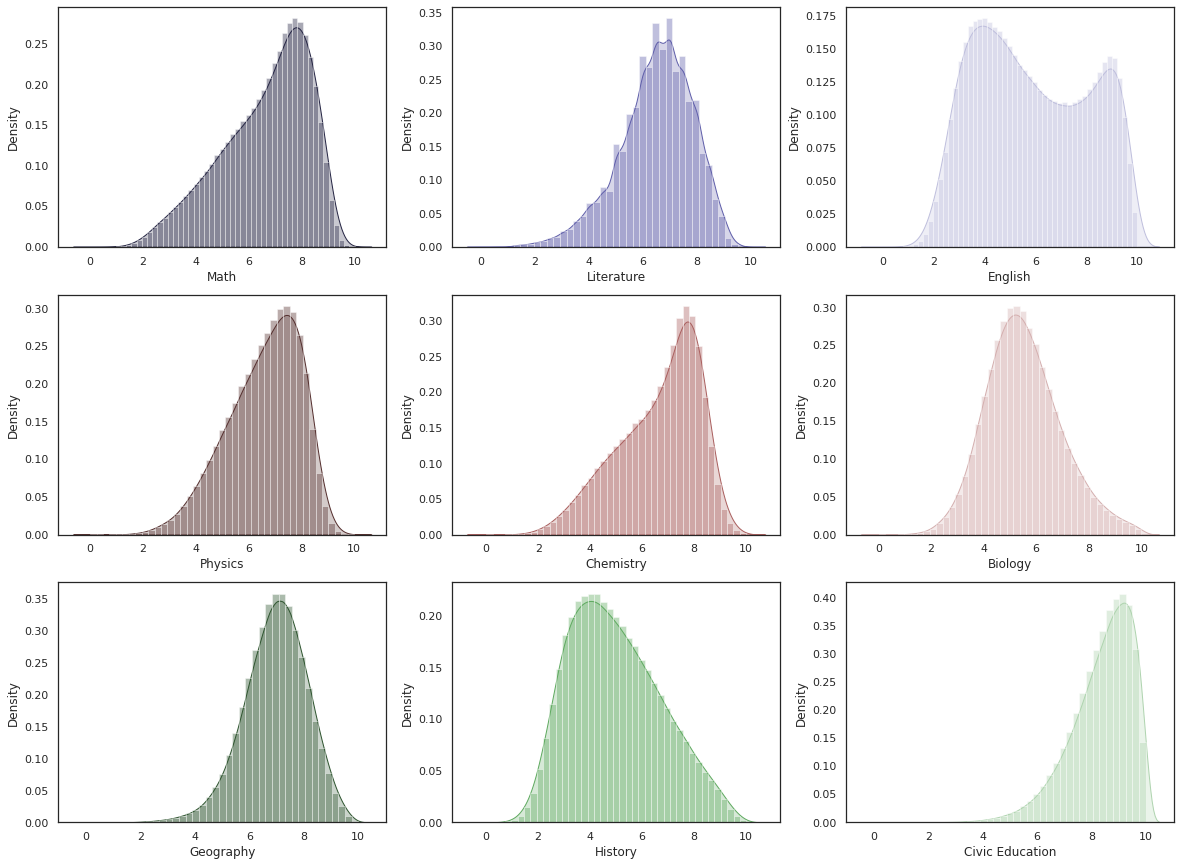

In [ ]:
score_dist(score2021, ["Math", "Literature", "English", "Physics", "Chemistry", "Biology", "Geography", "History", "Civic Education"], "line-bar", view="seperate", shade = True, smooth=True)

## Compare distributions and densities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



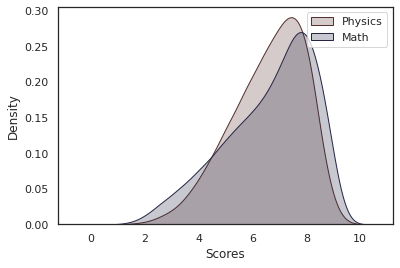

In [6]:
score_dist(score2021, ["Math", "Physics"], "line", view="together", shade = True, smooth=True)

## Correlogram between subjects

6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`d

<Figure size 2160x1440 with 0 Axes>

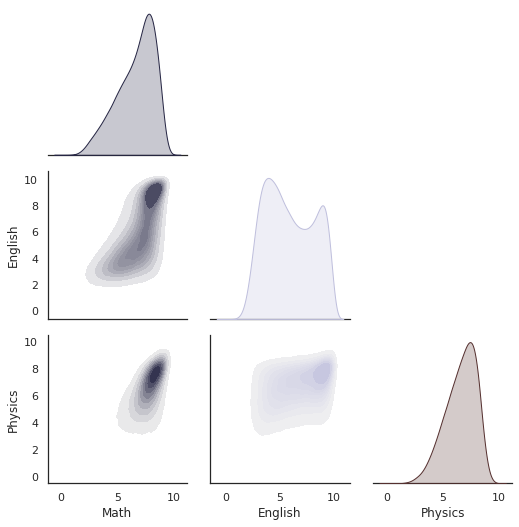

In [ ]:
score_dist(score2021, ["Math", "English", "Physics"], "line", view="correlogram", shade = True, smooth=True)